In [173]:
import numpy as np
import random
from typing import List, Tuple
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [164]:
@dataclass
class Individual:
    """
    Every time crossover, mutated, or selected, a new individual is created, cost must = None
    """
    genotype: np.ndarray
    cost: float = None

In [172]:
def create_random_population(dna_size: int, mutation_sigma: float, dna_start_position: float, population_size: int, dna_bounds: Tuple[float, float] = (0, 1)):    

    population = np.random.randn(population_size, dna_size) * mutation_sigma + dna_start_position

    np.clip(population, *dna_bounds, out=population)

    DataClass_Population = [
        Individual(genotype=population[i]) for i in range(population_size)
    ]

    return DataClass_Population

population = create_random_population(dna_size=3, mutation_sigma=0.1, dna_start_position=0.5, population_size=10)
population

[Individual(genotype=array([0.46916426, 0.45304389, 0.5405628 ]), cost=None),
 Individual(genotype=array([0.35355054, 0.56840331, 0.3530819 ]), cost=None),
 Individual(genotype=array([0.51439898, 0.38672907, 0.56443525]), cost=None),
 Individual(genotype=array([0.60042584, 0.30121535, 0.56071185]), cost=None),
 Individual(genotype=array([0.50878107, 0.72742172, 0.43440196]), cost=None),
 Individual(genotype=array([0.48373189, 0.450793  , 0.47695553]), cost=None),
 Individual(genotype=array([0.5352158 , 0.50430023, 0.27598382]), cost=None),
 Individual(genotype=array([0.4616436 , 0.64286607, 0.57295037]), cost=None),
 Individual(genotype=array([0.32305172, 0.44734234, 0.65286308]), cost=None),
 Individual(genotype=array([0.52285109, 0.3907713 , 0.65939425]), cost=None)]

In [206]:
# add calculate cost into crossover fn?

def crossover(parent1: Individual, parent2: Individual) -> Tuple[Individual, Individual]:    

        # if self.crossover_fn is not None:
        #     return self.crossover_fn(parent1, parent2)        

        # Select a random crossover point
        while True:
            crossover_point = random.randint(0, len(parent1.genotype) - 1)            
            if crossover_point != 0:
                break

        offspring1 = Individual(genotype=np.zeros(len(parent1.genotype)))
        offspring2 = Individual(genotype=np.zeros(len(parent1.genotype)))

        # Perform crossover
        for i in range(len(parent1.genotype)):
            if i < crossover_point:
                offspring1.genotype[i] = parent1.genotype[i]
                offspring2.genotype[i] = parent2.genotype[i]
                
            else:
                offspring1.genotype[i] = parent2.genotype[i]
                offspring2.genotype[i] = parent1.genotype[i]

        return offspring1, offspring2

dna1 = Individual(genotype=np.array([0,0,0,0,0,0]), cost=0)
dna2 = Individual(genotype=np.array([1,1,1,1,1,1]), cost=0)
crossover(dna1, dna2)

(Individual(genotype=array([0., 0., 1., 1., 1., 1.]), cost=None),
 Individual(genotype=array([1., 1., 0., 0., 0., 0.]), cost=None))

In [73]:
dna_bounds = [-1, 1]
mutation_rate = 0.5
mutation_sigma = 0.1

def mutate(chromosome: Individual) -> Individual:

    mutated_chromosome = Individual(genotype=np.zeros(len(chromosome.genotype)))

    for gene, i in zip(chromosome.genotype, range(len(chromosome.genotype))):

        if random.random() < mutation_rate:
            mutation_gene = np.random.randn() * mutation_sigma            
            gene += mutation_gene
            gene = min(max(gene, dna_bounds[0]), dna_bounds[1])
            mutated_chromosome.genotype[i] += gene
        else:
            mutated_chromosome.genotype[i] += gene

    return mutated_chromosome

chromosome = Individual(genotype=np.array([0,0,0,0,0,0]), cost=0)
mutate(chromosome)

Individual(genotype=array([ 0.        , -0.08263193, -0.00915863, -0.06485087,  0.        ,
        0.        ]), cost=None)

In [116]:
def roulette_wheel_selection(population: List[Individual]) -> int:

    cost_values = [individual.cost for individual in population]

    # Invert the cost values (higher costs become lower, and vice versa)
    inverted_costs = [1.0 / cost for cost in cost_values]

    # Calculate the total inverted cost
    total_inverted_cost = sum(inverted_costs)

    # Generate a random number between 0 and the total inverted cost
    random_value = np.random.uniform(0, total_inverted_cost)

    # Initialize variables for tracking cumulative inverted cost and the selected index
    cumulative_inverted_cost = 0
    selected_index = 0

    # Iterate through the inverted cost values to find the selected individual
    for i, inverted_cost in enumerate(inverted_costs):
        cumulative_inverted_cost += inverted_cost
        if cumulative_inverted_cost >= random_value:
            selected_index = i
            break

    return selected_index

def rw_genetic(population: List[Individual]) -> Tuple[Individual, Individual]:

    while True:
        index_p1 = roulette_wheel_selection(population)
        index_p2 = roulette_wheel_selection(population)        
        while index_p1 == index_p2:
            index_p2 = roulette_wheel_selection(population)                        
        else:
            break

    return population[index_p1], population[index_p2]

dna1 = Individual(genotype=np.array([0,0,0,0,0,0]), cost=100)
dna2 = Individual(genotype=np.array([1,1,1,1,1,1]), cost=1)
dna3 = Individual(genotype=np.array([1,1,1,1,1,1]), cost=10)

population = [dna1, dna2, dna3]
selected_index = roulette_wheel_selection(population)
print(selected_index)

rw_genetic(population)

1


(Individual(genotype=array([1, 1, 1, 1, 1, 1]), cost=1),
 Individual(genotype=array([1, 1, 1, 1, 1, 1]), cost=10))

In [163]:
def cost_C(baseline_value, chromosome: Individual) -> float:   
    """
    This function calculate the cost of the chromosome from loss parameter (gene in chromosome)
    """
    loss_cost = 0
    for i in range(len(baseline_value)):

        gene = chromosome.genotype[i]        

        if gene == 0 or gene == 1:
            gene = np.random.rand()

        k = np.log(baseline_value[i])/np.log(gene)
        loss_cost += k

    return loss_cost

def cost_F(objective_F, simulate_F):
    """
    This function calculate the cost of the chromosome from fidelity (gene in chromosome)
    """
    def Heaviside(x):
        if x >= 0:
            return 1
        else:
            return 0
        
    fidelity_cost = Heaviside(objective_F - simulate_F)
    return fidelity_cost

def total_cost_fn(cost_c, cost_f, w):
    """
    This function calculate the total cost of the chromosome from cost_c and cost_f
    """
    total_cost = w*cost_f + cost_c
    return total_cost

def test_cost_C():
    baseline_value = np.array([0.1, 0.2, 0.3, 0.4])
    chromosome = Individual(genotype=np.array([0,0,1,1]), cost=0)
    cost_C(baseline_value, chromosome)    

def test_cost_F():
    objective_F = 0.5
    simulate_F = 0.4
    cost_F(objective_F, simulate_F)

def test_total_cost_fn():
    cost_c = 1
    cost_f = 0
    w = 1
    total_cost_fn(cost_c, cost_f, w)

test_cost_C()
# test_cost_F()
# test_total_cost_fn()

gene 0
new gene 0.3550525512964655
gene 0
new gene 0.6323006456266049
gene 1
new gene 0.8951605224347906
gene 1
new gene 0.15654070761518812


In [ ]:
# want user to easy design their genetic process

elitism = 0.1
num_population = 10
baseline_value = np.array([0.5, 0.5, 0.5, 0.5])
num_iteration = 10

def main_process():
    amount_new = int(num_population*elitism)
    amount_old = num_population - amount_new

    # create random population
    population = create_random_population(
        dna_size=len(baseline_value), 
        mutation_sigma=0.1, 
        dna_start_position=0.5, 
        population_size=num_population
    )

    for i in range(num_iteration):
        

### validation algorithm

Text(0.5, 1.0, 'Rastrigin Function')

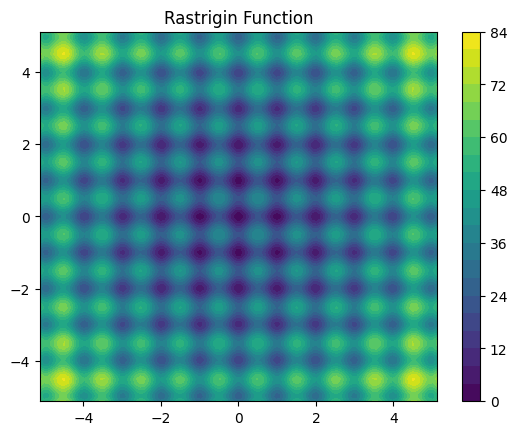

In [176]:
def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

plt.contourf(X, Y, Z, 20)
plt.colorbar();
plt.title('Rastrigin Function')

In [232]:
elitism = 0.4
num_population = 50
baseline_value = np.array([0.5, 0.5, 0.5, 0.5])
num_iteration = 100

def main_process():
    amount_new = int(num_population*elitism)
    amount_old = num_population - amount_new

    # create random population
    population = create_random_population(
        dna_size=2,
        mutation_sigma=2, 
        dna_start_position=0, 
        population_size=num_population,
        dna_bounds=[-5, 5]
    )
    first_population = np.copy(population)

    new_population = []
    min_cost_history = []
    avg_cost_history = []

    for iters in range(num_iteration):

        # calculate cost
        for individual in population:
            individual.cost = rastrigin(individual.genotype[0], individual.genotype[1])

        # amount new = 20, 20/2 = 10
        for i in range(amount_new // 2):
            parent_1, parent_2 = rw_genetic(population)            
            offspring_1, offspring_2 = crossover(parent_1, parent_2)            
            offspring_1 = mutate(offspring_1)
            offspring_2 = mutate(offspring_2)

            # calcuate cost for new offspring
            offspring_1.cost = rastrigin(offspring_1.genotype[0], offspring_1.genotype[1])
            offspring_2.cost = rastrigin(offspring_2.genotype[0], offspring_2.genotype[1])

            new_population.append(offspring_1)
            new_population.append(offspring_2)            
            
        assert len(new_population) == amount_new

        # amount old = 30
        for i in range(amount_old):
            index = roulette_wheel_selection(population)
            new_population.append(population[index])


        assert len(new_population) == num_population

        minimum_cost = np.min([individual.cost for individual in population])
        avg_cost = np.mean([individual.cost for individual in population])

        min_cost_history.append(minimum_cost)
        avg_cost_history.append(avg_cost)
        
        print(f'Iteration {iters} - Minimum cost: {minimum_cost}, avg cost: {avg_cost}')

        population = new_population
        new_population = []

        if iters == num_iteration - 1:
            final_population = np.copy(population)

    return first_population, final_population, min_cost_history, avg_cost_history

validate = main_process()

Iteration 0 - Minimum cost: 4.315798378661784, avg cost: 28.41109988808536
Iteration 1 - Minimum cost: 1.9298518129478577, avg cost: 17.597655507839644
Iteration 2 - Minimum cost: 1.9298518129478577, avg cost: 7.769547847621992
Iteration 3 - Minimum cost: 1.9298518129478577, avg cost: 5.380706424954252
Iteration 4 - Minimum cost: 1.0239867216628262, avg cost: 3.87763220538403
Iteration 5 - Minimum cost: 1.0222441915500475, avg cost: 2.3890481543268494
Iteration 6 - Minimum cost: 1.0222441915500475, avg cost: 2.350409182393536
Iteration 7 - Minimum cost: 0.2999200000461979, avg cost: 3.1110328842095187
Iteration 8 - Minimum cost: 0.2999200000461979, avg cost: 2.7586037679250706
Iteration 9 - Minimum cost: 0.2999200000461979, avg cost: 2.1864624923126668
Iteration 10 - Minimum cost: 0.06070025576251581, avg cost: 1.757406590946552
Iteration 11 - Minimum cost: 0.023760213663370777, avg cost: 0.8255518936261141
Iteration 12 - Minimum cost: 0.023760213663370777, avg cost: 0.9647587613285938

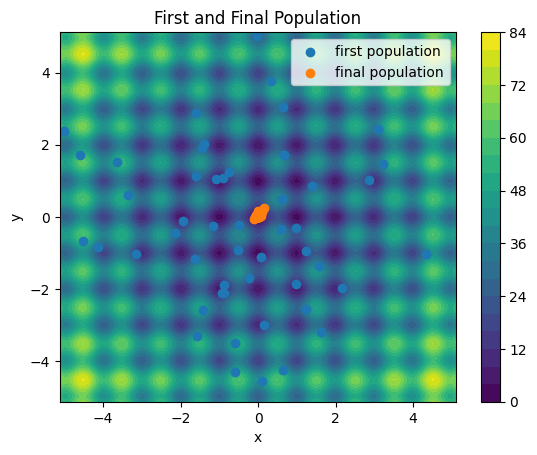

In [233]:
plt.contourf(X, Y, Z, 20)
plt.colorbar();

plt.scatter([individual.genotype[0] for individual in validate[0]], [individual.genotype[1] for individual in validate[0]], label='first population')
plt.scatter([individual.genotype[0] for individual in validate[1]], [individual.genotype[1] for individual in validate[1]], label='final population')
plt.legend()
plt.title('First and Final Population')
plt.xlabel('x')
plt.ylabel('y');


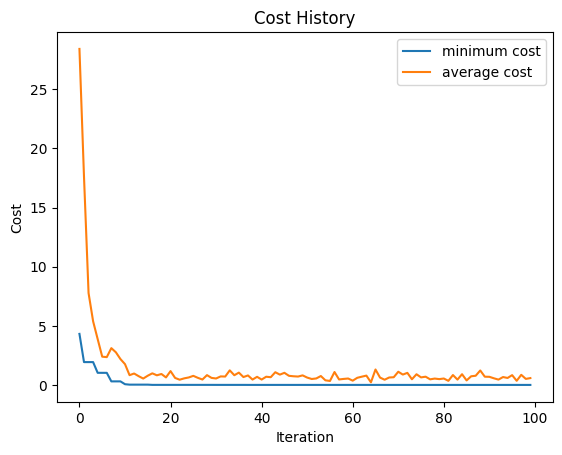

In [234]:
plt.plot(validate[2], label='minimum cost')
plt.plot(validate[3], label='average cost')
plt.legend()
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost');

### above this, I try to manipulate the generic system

In [ ]:
elitism = 0.4
num_population = 50
baseline_value = np.array([0.5, 0.5, 0.5, 0.5])
num_iteration = 100

def amount_new_process(num_new_individual:float, new_population: List):

    for i in range(num_new_individual):
        parent_1, parent_2 = rw_genetic(population)            
        offspring_1, offspring_2 = crossover(parent_1, parent_2)            
        offspring_1 = mutate(offspring_1)
        offspring_2 = mutate(offspring_2)

        # calcuate cost for new offspring
        offspring_1.cost = rastrigin(offspring_1.genotype[0], offspring_1.genotype[1])
        offspring_2.cost = rastrigin(offspring_2.genotype[0], offspring_2.genotype[1])

        new_population.append(offspring_1)
        new_population.append(offspring_2)            

def amount_old_process(num_old_individual:float, new_population: List):
    
    for i in range(num_old_individual):
        index = roulette_wheel_selection(population)
        new_population.append(population[index])

def validate_individual_generation(amount_new_fn: amount_new_process, amount_old_fn: amount_old_process, num_population, elitism):
    
    new_population = []
    amount_new = int(num_population*elitism)
    amount_old = num_population - amount_new

    amount_new_fn(amount_new, new_population)
    assert len(new_population) == amount_new

    amount_old_fn(amount_old, new_population)
    assert len(new_population) == num_population

def main_process():
    amount_new = int(num_population*elitism)
    amount_old = num_population - amount_new

    # create random population
    population = create_random_population(
        dna_size=2,
        mutation_sigma=2, 
        dna_start_position=0, 
        population_size=num_population,
        dna_bounds=[-5, 5]
    )
    first_population = np.copy(population)

    new_population = []
    min_cost_history = []
    avg_cost_history = []

    for iters in range(num_iteration):

        # calculate cost
        for individual in population:
            individual.cost = rastrigin(individual.genotype[0], individual.genotype[1])

        amount_new_process()

        # for i in range(amount_new // 2):
        #     parent_1, parent_2 = rw_genetic(population)            
        #     offspring_1, offspring_2 = crossover(parent_1, parent_2)            
        #     offspring_1 = mutate(offspring_1)
        #     offspring_2 = mutate(offspring_2)

        #     # calcuate cost for new offspring
        #     offspring_1.cost = rastrigin(offspring_1.genotype[0], offspring_1.genotype[1])
        #     offspring_2.cost = rastrigin(offspring_2.genotype[0], offspring_2.genotype[1])

        #     new_population.append(offspring_1)
        #     new_population.append(offspring_2)
            
        # assert len(new_population) == amount_new

        amount_old_process()

        # for i in range(amount_old):
        #     index = roulette_wheel_selection(population)
        #     new_population.append(population[index])


        # assert len(new_population) == num_population

        minimum_cost = np.min([individual.cost for individual in population])
        avg_cost = np.mean([individual.cost for individual in population])

        min_cost_history.append(minimum_cost)
        avg_cost_history.append(avg_cost)
        
        print(f'Iteration {iters} - Minimum cost: {minimum_cost}, avg cost: {avg_cost}')

        population = new_population
        new_population = []

        if iters == num_iteration - 1:
            final_population = np.copy(population)

    return first_population, final_population, min_cost_history, avg_cost_history

validate = main_process()

In [235]:
# def amount_new_process(num_new_individual:float, new_population: List):

#     for i in range(num_new_individual // 2):
#         parent_1, parent_2 = rw_genetic(population)            
#         offspring_1, offspring_2 = crossover(parent_1, parent_2)            
#         offspring_1 = mutate(offspring_1)
#         offspring_2 = mutate(offspring_2)

#         # calcuate cost for new offspring
#         offspring_1.cost = rastrigin(offspring_1.genotype[0], offspring_1.genotype[1])
#         offspring_2.cost = rastrigin(offspring_2.genotype[0], offspring_2.genotype[1])

#         new_population.append(offspring_1)
#         new_population.append(offspring_2)            

# def amount_old_process(num_old_individual:float, new_population: List):
    
#     for i in range(num_old_individual):
#         index = roulette_wheel_selection(population)
#         new_population.append(population[index])

# def validate_individual_generation(amount_new_fn: amount_new_process, amount_old_fn: amount_old_process, num_population, elitism):
    
#     new_population = []
#     amount_new = int(num_population*elitism)
#     amount_old = num_population - amount_new

#     amount_new_fn(amount_new, new_population)
#     assert len(new_population) == amount_new

#     amount_old_fn(amount_old, new_population)
#     assert len(new_population) == num_population

# validate_individual_generation(amount_new_process, amount_old_process, num_population=100, elitism=0.4)

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

In [237]:
def cost_C(baseline_value, chromosome: Individual) -> float:   
    """
    This function calculate the cost of the chromosome from loss parameter (gene in chromosome)
    """
    loss_cost = 0
    for i in range(len(baseline_value)):

        gene = chromosome.genotype[i]        

        if gene == 0 or gene == 1:
            gene = np.random.rand()

        k = np.log(baseline_value[i])/np.log(gene)
        loss_cost += k

    return loss_cost

def cost_F(objective_F: float, simulate_F: float):
    """
    This function calculate the cost of the chromosome from fidelity (gene in chromosome)
    """
    def Heaviside(x):
        if x >= 0:
            return 1
        else:
            return 0
        
    fidelity_cost = Heaviside(objective_F - simulate_F)
    return fidelity_cost

def total_cost_fn(baseline_value, chromosome: Individual, w: float, simulate_F: float, objective_F: float =0.7):
    """
    This function calculate the total cost of the chromosome from cost_c and cost_f
    """

    cost_c = cost_C(baseline_value, chromosome)
    cost_f = cost_F(objective_F, simulate_F)

    total_cost = w*cost_f + cost_c
    return total_cost

# --

In [239]:
population = create_random_population(
    dna_size=4,
    mutation_sigma=2, 
    dna_start_position=0, 
    population_size=100,
    dna_bounds=[-5, 5]
)

baseline_value = np.array([0.5, 0.5, 0.5, 0.5])
w=1
objective_F = 0.5
simulate_F = 0.4

for individual in population:            
    individual.cost = total_cost_fn(baseline_value, individual, w, simulate_F, objective_F)

    print(individual)

    # collect cost in this population's generation before generate new population
    minimum_cost = np.min([individual.cost for individual in population])
    avg_cost = np.mean([individual.cost for individual in population])

    # self.min_cost_history.append(minimum_cost)
    # self.avg_cost_history.append(avg_cost)

Individual(genotype=array([-1.90895385, -0.69484429,  2.51786197,  1.0454367 ]), cost=nan)


/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_89993/4241511611.py:13: RuntimeWarning: invalid value encountered in log
  k = np.log(baseline_value[i])/np.log(gene)


TypeError: '<=' not supported between instances of 'float' and 'NoneType'